### 45, "The Stock Market Record President"  -- Thanks a Lot 44!

Over the last few months in 2020, my wife would regularly come home from work exasperated at the political banter she had exchanged with her boss. He was a big 45 supporter; my wife was anything but -- and there was no common ground.  His evaluative focus was quite narrow though. A man of means, it was all about the economy or, more accurately, the stock market, stupid. And 45 delivered for him, setting index record after record while resurrecting the market from its pandemic depths -- or so he argued. The boss was quite happy with his ever-increasing capital accounts, and would regularly tease my wife: "well, another stock market record yesterday from our incredible president."

While my wife seethed, I cried foul: yes, the market under 45 was doing well, but no better than it did under 44's 1st term -- with two differences: 1) 44 didn't boast of market performance under his watch like 45; and 2) especially in 44's first term, the market indexes were setting no new records or high-water marks. Yet with my wife's boss, the records seemed to take on a life of their own -- as if, _per se_, they enhanced his wealth. 45's term "trumps" 44's first because 45 presided over so many new records, his argument went.

To help my wife counter that thinking, I first proposed "mathematical" logic with a simple example. President X assumes office when the stock market is at 1000 with the high-water mark of the S&P 500 index at 1002. The index then progresses 2%/month for 12 months under her watch.  President Y on the other hand, starts also at 1000 and presides over 3%/month for 12 months, but with an initial market high point of 1500. At the end of the year, X's market has grown to 1000\*1.02**12 = 1268 with 12 new "records", while Y's has grown to 1426 with none. A 426 profit on a 1000 investment is of course preferred to 268. _Sadly,  there's no extra credit for stock market records._

Alas, that argument didn't resonate, so I proceeded to where I should have gone in the first place: with the data. The simple challenge was to compare the S&P 500 performance of 45's term in office with 44's first term, contrasting both for the growth of identical initial investments.  The analyses that follow depart with daily S&P 5000 stock market index data from Yahoo Finance (ticker ^GSPC). It's easy to download the data in R, and simple as well to wrangle them to the point they can readily contrast the performance of 44 and 45. The notebook cells below do just that. At the end, a visualization starkly summarizes much of the story.

The supporting platform is a Wintel 10 notebook with 128 GB RAM, along with software JupyterLab 1.2.4 and R 4.0.2. The R data.table, tidyquant, fst, feather, and ggplot packages are featured, as well as functions from my personal stash.

Let's get started.

Where are the R libraries?

In [13]:
.libPaths()

[1] "C:/R/4.0.2/library"                 "C:/Program Files/R/R-4.0.2/library"

Set options and load relevant R libraries. Source a personal R function file.

In [14]:
options(warn=-1) 
options(scipen = 20)
options(datatable.print.topn=100)
options(datatable.showProgress=FALSE)
options(stringsAsFactors=TRUE)

usualsuspects <- c(
     'data.table', 'pryr', 'plyr','readxl', 'bit',    
    'rvest', 'magrittr','lubridate','rlist', #'dplyr',
    'tidyquant',
    'fst','feather',
    'knitr', 'kableExtra',  
    'ggplot2','RColorBrewer',
    'patchwork','hrbrthemes'
) 

suppressMessages(invisible(lapply(usualsuspects, library, character.only = TRUE)))

funcsdir <- "/steve/r/functions"
funcsfile <- "rfunctions.r"

setwd(funcsdir)
source(funcsfile)


blanks(1)
lsf.str()

blanks(2)

allfreqs : function (dtn, catlim = 100)  
blanks : function (howmany)  
colsize : function (dt)  
dtmeta : function (df)  
freqsdt : function (DTstr, xstr, percent = TRUE)  
meta : function (df, data = FALSE, dict = TRUE)  
mksumfreq : function (freqalldt)  
mksumfreq2 : function (dt)  
mykab : function (dt)  
obj_sz : function (obj)  
prhead : function (df, howmany = 6)  
prheadtail : function (df, howmany = 6)  

Download daily S&P 500 (ticker ^GSPC) index levels from Yahoo Finance using the splendid R tidyquant package. Wrangle said data with powerful data.table grammar. Write output files in feather and fst formats. Show the results deploying the sourced meta function. I use the "adjusted" attribute from data.table sp500 to indicate the end-of-day market level, though "close" is identical.

In [15]:
start <- proc.time() 

wdir <- "c:/data/sp500"
setwd(wdir)


symbols <- c("^GSPC")
fromdte <- "1927-12-30"

sp500 <- data.table(tq_get(symbols,from=fromdte))[order(date)]
setnames(sp500, tolower(gsub(" ","",names(sp500)))) 

sp500[,c("idx","pctch","close1") := .(seq_len(nrow(sp500)),Delt(close),close/close[1])]

nr <- nrow(sp500)
sp500$cumprod = c(NA,cumprod(1+sp500[2:nr]$pctch))

fname <- "sp500.feather"
write_feather(sp500,fname)

fname <- "sp500.fst"
write_fst(sp500,fname)

stvars <- c("idx","date","close","pctch")
sp500st <- copy(sp500[,stvars,with=FALSE])

sp500[,c("volume","close1"):=.(NULL,NULL)]

meta(sp500,data=TRUE)

stop <- proc.time() 
print(stop-start)

blanks(2)



|name |class                 |rows |columns|size  |
|:----|:---------------------|:----|:------|:-----|
|sp500|data.table, data.frame|23385|10     |1.7 MB|


|symbol|date      |open |high |low  |close|adjusted|idx|pctch    |cumprod |
|:-----|:---------|:----|:----|:----|:----|:-------|:--|:--------|:-------|
|^GSPC |1927-12-30|17.66|17.66|17.66|17.66|17.66   |1  |NA       |NA      |
|^GSPC |1928-01-03|17.76|17.76|17.76|17.76|17.76   |2  |0.005663 |1.005663|
|^GSPC |1928-01-04|17.72|17.72|17.72|17.72|17.72   |3  |-0.002252|1.003397|
|^GSPC |1928-01-05|17.55|17.55|17.55|17.55|17.55   |4  |-0.009594|0.993771|
|^GSPC |1928-01-06|17.66|17.66|17.66|17.66|17.66   |5  |0.006268 |1.000000|
|^GSPC |1928-01-09|17.50|17.50|17.50|17.50|17.50   |6  |-0.009060|0.990940|


|symbol|date      |open   |high   |low    |close  |adjusted|idx  |pctch    |cumprod |
|:-----|:---------|:------|:------|:------|:------|:-------|:----|:--------|:-------|
|^GSPC |2021-01-28|3755.75|3830.50|3755.75|3787.38|3787.38

Set pertinent inauguration dates + the start date of S&P 500 index tracking for subsequent use.

In [16]:
sp1 <- min(sp500$date)
o1 <- "2009-01-20"
o2 <- "2013-01-21"
t1 <- "2017-01-20"
b1 <- "2021-01-20"

blanks(2)

Secure the sp500 records for: 1) the start date of 44's first administration;  2) the S&P 500 high-water mark at the start of that 1st administration; and 3) the end date of the administration. Compute the ratio of beginning to end index levels, as well as the ratio of beginning to high point. 44's 1st term witnessed a 75% return -- i.e., a \\$1000 investment on inauguration day would have morphed to \$1750 at term's end 4 years later. Also, the S&P 500 was just 54% of its high-water mark at the time of inauguration, implying that the index would have to increase roughly 82% to reach a new record. More, that record was set on 2007-10-09, a full 15 months before the inauguration, corroborating that 2008 was a bad year in the markets. Even with the 75% increase, no S&P high water marks were seen during 44's 1st term, as evidenced from the calcs below.

In [17]:
ob1 <- sp500[date<o1][which(date==max(date))]
ob1

ob2 <- sp500[date<o1][which(adjusted==max(adjusted))]
ob2

ob3 <- sp500[date<o2][which(date==max(date))]
ob3

blanks(1)

round(ob3$adjusted/ob1$adjusted,2)
round(ob1$adjusted/ob2$adjusted,2)

blanks(2)

symbol,date,open,high,low,close,adjusted,idx,pctch,cumprod
<chr>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
^GSPC,2009-01-16,844.45,858.13,830.66,850.12,850.12,20352,0.007561577,48.13817


symbol,date,open,high,low,close,adjusted,idx,pctch,cumprod
<chr>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
^GSPC,2007-10-09,1553.18,1565.26,1551.82,1565.15,1565.15,20031,0.008096245,88.62684


symbol,date,open,high,low,close,adjusted,idx,pctch,cumprod
<chr>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
^GSPC,2013-01-18,1480.95,1485.98,1475.81,1485.98,1485.98,21360,0.00340327,84.14383


[1] 1.75

[1] 0.54

Locate new S&P 500 high-water marks under 44-1. Not an efficient coding metaphor in R, but the data volume is small.

In [18]:
high = ob2$adjusted
records = data.table()

ud = sp500[date>=o1 & date<o2]$date
for (u in ud)
{
    slug <-sp500[date==u]
    if (slug$adjusted>high)
    {
        records = rbind(records,data.table(date=as_date(u),high=slug$adjusted))
        high = slug$adjusted
    }
}

blanks(2)

How many?

In [19]:
nrow(records)

blanks(2)

[1] 0

In contrast, consider the S&P 500 performance under 45. Despite the pandemic, he managed to oversee a commendable 68% index increase. But now look at his point of departure: 99% of the S&P high point at the start of his presidency! And that "record" was set under 44 -- just two weeks prior to the inauguration. Establishing new high points given that boon is thus not much to brag about, though 45 took advantage, presiding over no less than 150 new S&P 500 high water marks over his term, as evidenced in the cells below.

In [20]:
tr1 <- sp500[date<t1][which(date==max(date))]
tr1

tr2 <- sp500[date<t1][which(adjusted==max(adjusted))]
tr2

tr3 <- sp500[date<b1][which(date==max(date))]
tr3

blanks(1)

round(tr3$adjusted/tr1$adjusted,2)
round(tr1$adjusted/tr2$adjusted,2)

blanks(2)

symbol,date,open,high,low,close,adjusted,idx,pctch,cumprod
<chr>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
^GSPC,2017-01-19,2271.9,2274.33,2258.41,2263.69,2263.69,22367,-0.003609309,128.1818


symbol,date,open,high,low,close,adjusted,idx,pctch,cumprod
<chr>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
^GSPC,2017-01-06,2271.14,2282.1,2264.06,2276.98,2276.98,22359,0.003516959,128.9343


symbol,date,open,high,low,close,adjusted,idx,pctch,cumprod
<chr>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
^GSPC,2021-01-19,3781.88,3804.53,3780.37,3798.91,3798.91,23373,0.008136379,215.1138


[1] 1.68

[1] 0.99

Find the S&P 500 high water marks under 45.

In [21]:
high = tr2$adjusted
records = data.table()

ud = sp500[date>=t1 & date<b1]$date
for (u in ud)
{
    slug <-sp500[date==u]
    if (slug$adjusted>high)
    {
        records = rbind(records,data.table(date=as_date(u),high=slug$adjusted))
        high = slug$adjusted
    }
}

blanks(2)

How many?

In [22]:
nrow(records)

blanks(2)

[1] 150

Which ones?

In [23]:
meta(records,data=TRUE)

blanks(2)



|name   |class                 |rows|columns|size   |
|:------|:---------------------|:---|:------|:------|
|records|data.table, data.frame|150 |2      |3.64 KB|


|date      |high   |
|:---------|:------|
|2017-01-24|2280.07|
|2017-01-25|2298.37|
|2017-02-09|2307.87|
|2017-02-10|2316.10|
|2017-02-13|2328.25|
|2017-02-14|2337.58|


|date      |high   |
|:---------|:------|
|2020-12-08|3702.25|
|2020-12-17|3722.48|
|2020-12-28|3735.36|
|2020-12-31|3756.07|
|2021-01-07|3803.79|
|2021-01-08|3824.68|

Classes 'data.table' and 'data.frame':	150 obs. of  2 variables:
 $ date: Date, format: "2017-01-24" "2017-01-25" ...
 $ high: num  2280 2298 2308 2316 2328 ...
 - attr(*, ".internal.selfref")=<externalptr> 
NULL

 


The visualization below, driven by R's nifty ggplot, starkly highlights 44's munificence to 45. The right panel traces S&P 500 performance over the dates of 44's first term. The y-axis on the left details the actual levels; the one on the right normalizes the levels to start at 1, thus showcasing 44's 'return'. The blue dashed line indicates the index high water mark at inauguration. Tellingly, that level, set on 2007-10-09, was 80%+ more than 44's starting value, reflecting the steep market descent in 2008. The left panel tells a similar story for 45's term. The pandemic decline is seen clearly, as is the recovery. The blue dashed line indicates 45's strong starting high water mark position, set 217-01-06, just two weeks before inauguration. 45 was clearly teed up for the bounty of market records during his term.

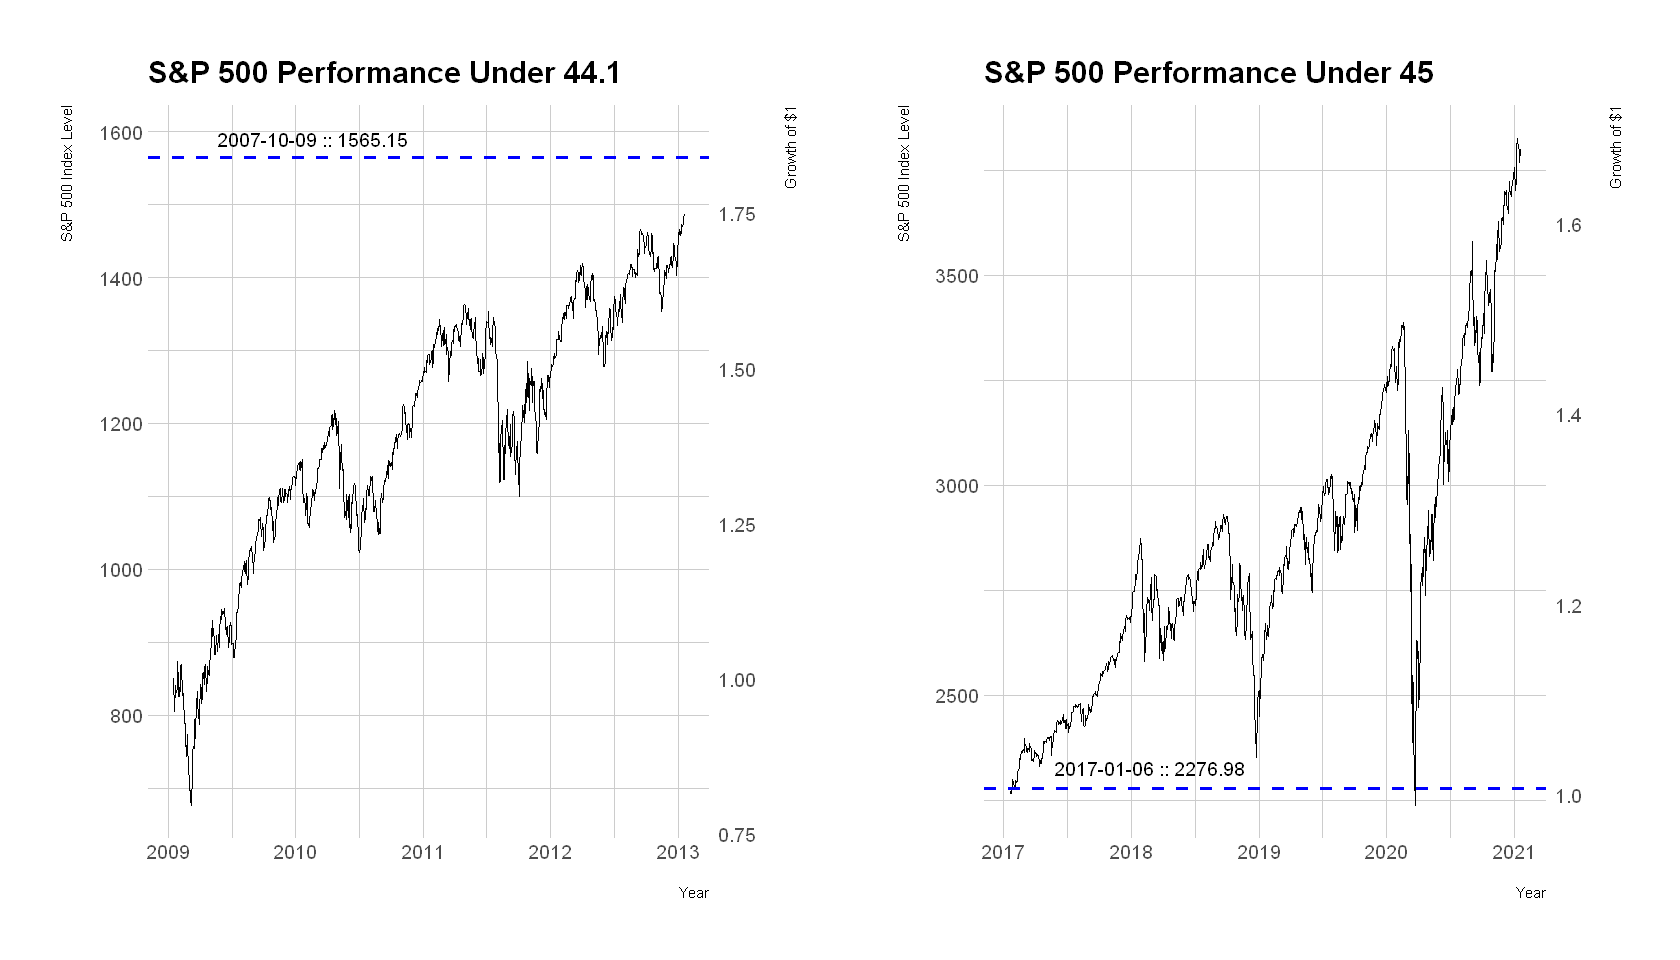

In [24]:
w1 = tail(sp500[date<o1],1)
p1 <- ggplot(sp500[date>=w1$date & date<o2],
    aes(x=date,y=adjusted)) + 
    geom_line() +
    theme_ipsum() +
    scale_y_continuous(
    name = "S&P 500 Index Level\n",
    sec.axis = sec_axis(~.*(1/w1$adjusted),"\nGrowth of $1")) +
    geom_hline(yintercept=ob2$adjusted, linetype="dashed", 
                color = "blue", size=1) +
    geom_text(data = ob2, aes(x = ob1$date+400,  y = adjusted+25, label = paste0(ob2$date," :: ",round(adjusted,2))),col='black',size=4) +

    
    labs(title="S&P 500 Performance Under 44.1", x="\nYear")  

w2 = tail(sp500[date<t1],1)
p2 <- ggplot(sp500[date>=w2$date & date<b1],
    aes(x=date,y=adjusted)) + 
    geom_line() +
    theme_ipsum() +
    scale_y_continuous(
    name = "S&P 500 Index Level\n",
    sec.axis = sec_axis(~.*(1/w2$adjusted),"\nGrowth of $1")) +
    geom_hline(yintercept=tr2$adjusted, linetype="dashed", 
                color = "blue", size=1) +
     geom_text(data = tr2, aes(x = tr1$date+400,  y = adjusted+50, label = paste0(tr2$date," :: ",round(adjusted,2))),col='black',size=4) +
   
    labs(title="S&P 500 Performance Under 45", x="\nYear")  


options(repr.plot.width=14, repr.plot.height=8)

p1+p2

blanks(2)

In sum, 45's claim to being "the stock market record president" is not without some merit. Under his watch, the S&P 500 grew 68%, setting new high water marks no less than 150 times. And yet he was unable to shake his hated predecessor 44, who "delivered" superior 75% market growth his first term unobtrusively. Moreover, it's easy to see what a nothing burger is the boast of setting high water mark after high-water mark of S&P 500 index levels. Such records have little to do with either presidential prowess or market returns, but rather are mostly dependent on a fortuitously inherited starting position. Indeed, had the market index been at 54% of its high water mark at 45's inauguration, he too would have set no records. Aren't counterfactuals "nasty"? In the end, 44 got a terrible start from 43, while 45 got a great one from 44. Thanks a lot 44! 